In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.optim as optim

import util
from network2 import Unet
from augmented_dataset import AugmentedDataset
import train2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
# Load the dataset (pair satellite image with its groundtruth)

augmented_dataset = AugmentedDataset(
    file_path_data="dataset/training/images",
    file_path_label="dataset/training/groundtruth"
)

In [3]:
# if you want split the training set in training and validation set (90%, 10%)
train, val = torch.utils.data.random_split(augmented_dataset, [90, 10])
dataloader_train = DataLoader(train, batch_size=20, shuffle=True)
dataloader_val = DataLoader(val, batch_size=20, shuffle=True)

# otherwise just
#dataloader = DataLoader(augmented_dataset, batch_size=20, shuffle=True)

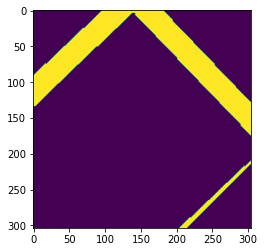

In [4]:
# get an image pair of the training set (note there is data augmentation on the fly)
img, label = train[2]

# print the groundtruth
plt.imshow(transforms.ToPILImage()(label))

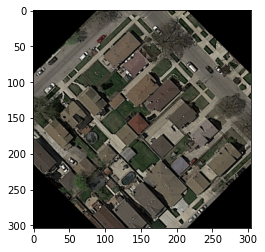

In [5]:
# print the image
plt.imshow(transforms.ToPILImage()(img))

In [6]:
# instanciate the deep network and put on the device (here GPU)
model = Unet()
model = model.to(device)

# if you want use a pretrain model use:

#model.load_state_dict(torch.load("models/your_model.pt"))
#model.eval()

In [7]:
#compute the accuracy and f1 score of the model (on the training set)
print(train2.accuracy(model, dataloader_train, device), train2.f1score(model, dataloader_train, device))

tensor(0.8255) 0.0


In [8]:
# use Adam optimizer with learnig rate 0.001
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# train the model on 30 epochs
train2.train(dataloader_train, model, optimizer, 30, device)

Epoch: 0 | Loss: 6.238505125045776
Epoch: 1 | Loss: 5.065640568733215
Epoch: 2 | Loss: 4.828417658805847
Epoch: 3 | Loss: 4.627508580684662
Epoch: 4 | Loss: 4.470284879207611
Epoch: 5 | Loss: 4.309368014335632
Epoch: 6 | Loss: 4.166185200214386
Epoch: 7 | Loss: 3.8956762552261353
Epoch: 8 | Loss: 3.65979927778244
Epoch: 9 | Loss: 3.5750368237495422
Epoch: 10 | Loss: 3.5623480081558228
Epoch: 11 | Loss: 3.3511508107185364
Epoch: 12 | Loss: 3.312076985836029
Epoch: 13 | Loss: 3.244207799434662
Epoch: 14 | Loss: 3.101569175720215
Epoch: 15 | Loss: 3.2275502681732178
Epoch: 16 | Loss: 3.203335225582123
Epoch: 17 | Loss: 3.148754060268402
Epoch: 18 | Loss: 3.0998916625976562
Epoch: 19 | Loss: 3.0187432169914246
Epoch: 20 | Loss: 2.9170422554016113
Epoch: 21 | Loss: 2.861207604408264
Epoch: 22 | Loss: 2.9668709337711334
Epoch: 23 | Loss: 2.9676435589790344
Epoch: 24 | Loss: 2.7131590247154236
Epoch: 25 | Loss: 2.6390592455863953
Epoch: 26 | Loss: 2.8713815212249756
Epoch: 27 | Loss: 2.562390

In [9]:
# Recompute the accuracy and f1 score on the training set (we can also do on the validation test)
train2.accuracy(model, dataloader_train, device), train2.f1score(model, dataloader_train, device)

(tensor(0.8898), 0.7069707314155032)

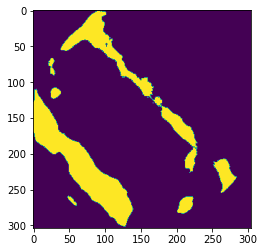

In [10]:
# get a batch of the data loader (satellite image, groundtruth)
x, y = next(iter(dataloader_train))

# use the batch generated to predict the output and print the output
with torch.no_grad():
    output, batch = model(x.to(device))
    output[output < 0.5] = 0
    output[output >= 0.5] = 255
    plt.imshow(transforms.ToPILImage()(output[0]))

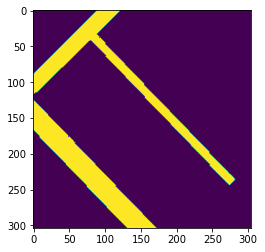

In [11]:
# print the groundtruth to compare
plt.imshow(transforms.ToPILImage()(y[0]))

In [12]:
# save the model 
torch.save(model.state_dict(), "models/Unet_example.pt")

In [13]:
# patch the test set to have images of same size that the training set
patchs_test = util.parseTestSet("dataset/test_set/test_imgs")

In [14]:
# generate the groundtruth for the test set  and save in the path indicated
util.generate_groundtruth_test_set(patchs_test, model, device, 'results/example')

In [15]:
# if you want to convert the output patch in mask
util.generate_groundtruth_test_set(patchs_test, model, device, 'results/example')